**Логистическая регрессия**

*Импортируем необходимые библиотеки*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

*Добавим сигмоиду (для удобства запишем ее отдельно как функцию)*

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

*Для расчета параметров градиента и значения функции потерь добавим функцию log_loss*

In [3]:
def log_loss(w, X, y):

    m = X.shape[0]
    z = X @ w
    y_hat = sigmoid(z)

    loss = -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))
    grad = X.T @ (y_hat - y) / m

    return loss, grad

*Добавим функцию optimize для обновления весов с использованием градиентного спуска и записи значений функции потерь на каждой итерации*

In [4]:
def optimize(w, X, y, n_iterations=1000, eta=0.1):
    losses = []
    for _ in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad
        losses.append(loss)

    return w, losses

*Добавим функцию predict для вычисления вероятности классов с помощью сигмоиды*

*Она присваивает класс 1, если вероятность выше порога b=0.5, иначе — 0*

In [5]:
def predict(w, X, threshold=0.5):
    probs = sigmoid(X @ w)
    return (probs >= threshold).astype(int)


*Создаем случайные данные, добавляем смещение и обучаем модель*

In [6]:
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
true_w = np.array([2, -3])
y = (sigmoid(X @ true_w + 0.5) > 0.5).astype(int)

X_b = np.hstack([np.ones((X.shape[0], 1)), X])
w_init = np.zeros(X_b.shape[1])

w_trained, losses = optimize(w_init, X_b, y, n_iterations=1000, eta=0.1)

*Визуализируем функцию потерь (в данном случае она логарифмическая), а также отобразим результаты accuracy:*

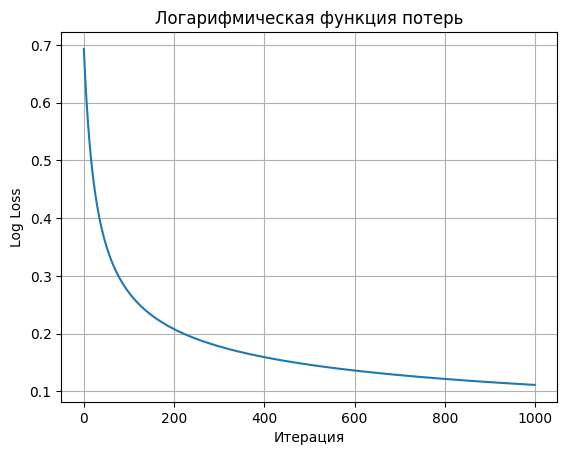

Точность: 1.0000


In [7]:
plt.plot(losses)
plt.xlabel("Итерация")
plt.ylabel("Log Loss")
plt.grid(True)
plt.title("Логарифмическая функция потерь")
plt.show()

y_pred = predict(w_trained, X_b)
accuracy = np.mean(y_pred == y)
print(f"Точность: {accuracy:.4f}")

**Ответы на дополнительные вопросы:**

Вопрос 1

*Как влияет размер шага (eta) на сходимость алгоритма?*


Ответ:

*Маленька eta замедляет обучение, а если eta большая, то это может привести к расходимости градиентного спуска (ошибка растёт вместо уменьшения)*

---

Вопрос 2

*Что произойдет, если выбрать слишком маленькое или слишком большое количество итераций (n_iterations)?*


Ответ:

*Маленькое количество - модель не дообучится (ошибка будет по-прежнему высокой), а если оличество большое, то это может привести переобучению*

---

Вопрос 3

*Почему логистическая регрессия подходит для задач только бинарной классификации?*


Ответ:

*Сигмоидная функция, используемая в логистической регрессии, преобразует значение скалярного произведения признаков и весов в диапазон [0, 1].*

*Это значение интерпретируется как вероятность принадлежности объекта к одному из двух классов — 1 или 0.*

*Таким образом, логистическая регрессия изначально предназначена для бинарной классификации.*